In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn

from random import seed
seed(1)


kaggle = 1 # Kaggle active 1

if kaggle == 1 :
    MNIST_PATH= '../input/digit-recognizer'
else:
    MNIST_PATH= '../Another_MNIST_try/data/input/digit-recognizer'



%matplotlib inline

import os
for dirname, _, filenames in os.walk(MNIST_PATH): 
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/digit-recognizer/sample_submission.csv
../input/digit-recognizer/train.csv
../input/digit-recognizer/test.csv


# The Big Picture
Link to the topic: https://www.kaggle.com/c/digit-recognizer/data

# Get Data

In [2]:
# Data path and file
#MNIST_PATH= '../input/digit-recognizer'
#MNIST_PATH= '../Another_MNIST_try/data/input/digit-recognizer'
CSV_FILE_TRAIN='train.csv'
CSV_FILE_TEST='test.csv'

def load_mnist_data(minist_path, csv_file):
    csv_path = os.path.join(minist_path, csv_file)
    return pd.read_csv(csv_path)

def load_mnist_data_manuel(minist_path, csv_file):
    csv_path = os.path.join(minist_path, csv_file)
    csv_file = open(csv_path, 'r')
    csv_data = csv_file.readlines()
    csv_file.close()
    return csv_data

def split_train_val(data, val_ratio):
    return 
    

train = load_mnist_data(MNIST_PATH,CSV_FILE_TRAIN)
test = load_mnist_data(MNIST_PATH,CSV_FILE_TEST)

train_2 = load_mnist_data_manuel(MNIST_PATH,CSV_FILE_TRAIN)

In [3]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Discover and Visualize the Data

In [6]:
train_copy = train.copy()

In [7]:
# separating labels from features
mnist_features = train_copy.drop('label', axis=1)
mnist_labels = train_copy['label']

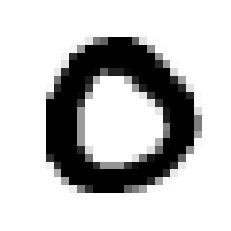

In [8]:
plt.imshow(np.asfarray(mnist_features[4:5]).reshape(28,28), cmap='binary')
plt.axis("off")
plt.show()

In [9]:
def print_digits(digit_dataframe):
    figsize = (8,6)
    cols = 4
    rows = 6 // cols +1 

    def trim_axs(axs, N):
        """
        Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
        """
        axs = axs.flat
        for ax in axs[N:]:
            ax.remove()
        return axs[:N]


    axs = plt.figure(figsize=figsize).subplots(rows, cols)
    axs = trim_axs(axs, len(digit_dataframe))

    i = 0

    for ax in axs:
        ax.imshow((np.asfarray(digit_dataframe.iloc[i]).reshape(28,28)),cmap='binary')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        i = i + 1


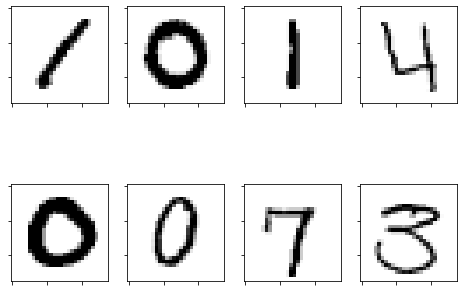

In [10]:
print_digits(mnist_features)

## Correlation Matrix

In [11]:
corr_matrix = train_copy.corr()

In [12]:
corr_matrix['label'].sort_values(ascending=False)

label       1.000000
pixel381    0.431506
pixel409    0.423767
pixel436    0.420922
pixel408    0.413855
              ...   
pixel760         NaN
pixel780         NaN
pixel781         NaN
pixel782         NaN
pixel783         NaN
Name: label, Length: 785, dtype: float64

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='pixel381', ylabel='pixel381'>,
        <AxesSubplot:xlabel='pixel409', ylabel='pixel381'>,
        <AxesSubplot:xlabel='pixel436', ylabel='pixel381'>,
        <AxesSubplot:xlabel='pixel408', ylabel='pixel381'>],
       [<AxesSubplot:xlabel='pixel381', ylabel='pixel409'>,
        <AxesSubplot:xlabel='pixel409', ylabel='pixel409'>,
        <AxesSubplot:xlabel='pixel436', ylabel='pixel409'>,
        <AxesSubplot:xlabel='pixel408', ylabel='pixel409'>],
       [<AxesSubplot:xlabel='pixel381', ylabel='pixel436'>,
        <AxesSubplot:xlabel='pixel409', ylabel='pixel436'>,
        <AxesSubplot:xlabel='pixel436', ylabel='pixel436'>,
        <AxesSubplot:xlabel='pixel408', ylabel='pixel436'>],
       [<AxesSubplot:xlabel='pixel381', ylabel='pixel408'>,
        <AxesSubplot:xlabel='pixel409', ylabel='pixel408'>,
        <AxesSubplot:xlabel='pixel436', ylabel='pixel408'>,
        <AxesSubplot:xlabel='pixel408', ylabel='pixel408'>]], dtype=object)

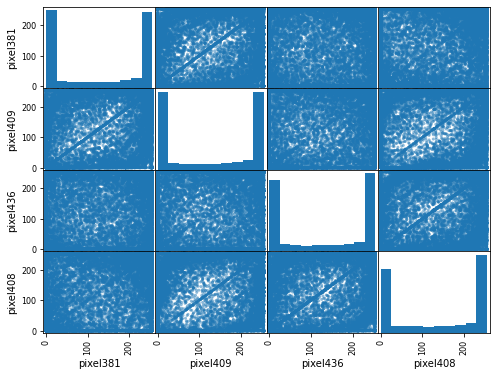

In [13]:
attributes = ['pixel381','pixel409','pixel436','pixel408']

pd.plotting.scatter_matrix(train_copy[attributes], figsize=(8,6))

# Prepare Data for Algorithm
- Write functions to build transformation pipelines
- Scaling features (normalization)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Pipeline for transforming / scaling the data in various ways
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

### Pipelines
Fit the pipeline on training data only and then transform it based on the fitted pipeline.

In [15]:
mnist_features_prepared = num_pipeline.fit_transform(mnist_features)
mnist_features_prepared

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Choose a Model

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Train classifier with prepared train set
kneighbors = KNeighborsClassifier()
kneighbors.fit(mnist_features_prepared, mnist_labels)

KNeighborsClassifier()

### First Test  
Using some (original) train data for tests. I need to transform them again (with the pipeline) because I selected them from the original unmodified train set. This is the best way to do it instead of using the same data object which has already been trained with the model.

In [17]:
some_digits = mnist_features[:8]
some_digits_labels = mnist_labels[:8]

some_digits_prepared = num_pipeline.transform(some_digits)

In [18]:
# Test the new classifier
print("Following were predicted: ", kneighbors.predict(some_digits_prepared))
print("The labels: ", list(some_digits_labels))

Following were predicted:  [1 0 1 4 0 0 7 3]
The labels:  [1, 0, 1, 4, 0, 0, 7, 3]


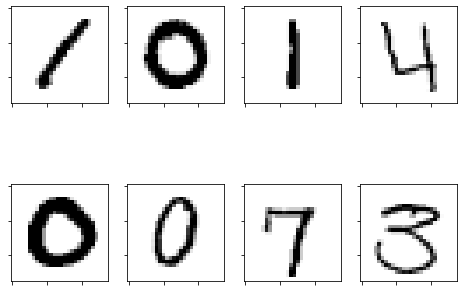

In [19]:
print_digits(some_digits)

## Accuracy with Cross Validation and Confusion Matrix (Very important within Classification Problems)

In [20]:
from sklearn.model_selection import cross_val_predict

mnist_label_preds = cross_val_predict(KNeighborsClassifier(), mnist_features_prepared, mnist_labels, cv=3, n_jobs=-1)

In [21]:
print("Cross Val Predict results: " , mnist_label_preds)

Cross Val Predict results:  [1 0 1 ... 7 6 9]


The following Confusion Matrix prints the amount of predicted labels corresponding to their x and y coordinates. That means the 0 (at X = 0) has been labeld 4104 times with a prediction label 0 (at Y = 0). This corresponds to a correct prediction of 4103 times. The otherway around can be seen at the coordinates x=3 y=8. The digit 3 has been predicted 78 times as the digit 8 instead of the digit 3. The color highlighting of the Confusion Matrix does show this very good.

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(mnist_label_preds, mnist_labels)

<AxesSubplot:>

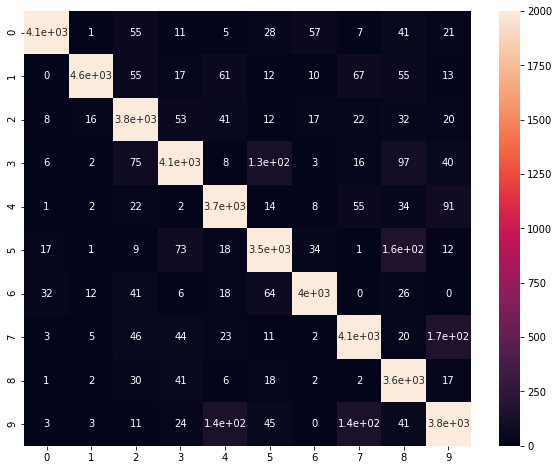

In [23]:
#Confusion matrix 
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True, vmin=0, vmax=2000)

The following Confusion Matrix shows the relative error corresponding to its category. This is necessary in case of not balanced category values.

<AxesSubplot:>

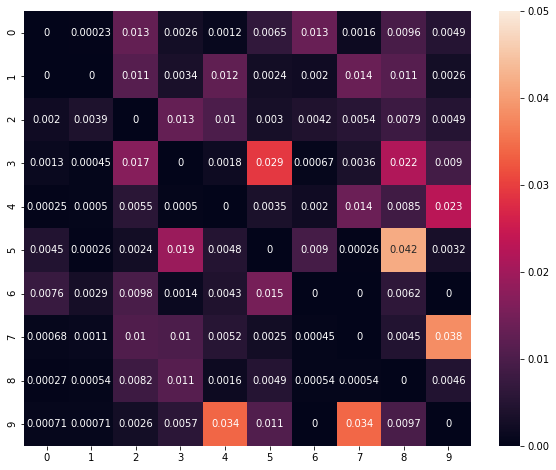

In [24]:
row_sums = cm.sum(axis=1, keepdims=True) 
norm_conf_mx = cm / row_sums # normalized confusion matrix

np.fill_diagonal(norm_conf_mx, 0)

plt.figure(figsize = (10,8))
sn.heatmap(norm_conf_mx, annot=True, vmin=0, vmax=0.05)

This Confusion Matrix shows us clearly that there is a small amout of errors in predicting the digit 4 respectively in predicting the digit 9 for the digit 4 with an error rate of 2.3%. But its only in this case, the otherway around works better. In case of the digit 9, the predictor has only an error rate of 1.1% when mistakenly predicting a 4. <br>
<br>
The digit 8 seems to be more often mispredicted then other digits, its visualized by the more brighter rowbased results.

### Precision, Recall and F1-Score

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision: ",precision_score(mnist_labels, mnist_label_preds, average='weighted'))
print("Recall: ",recall_score(mnist_labels, mnist_label_preds, average='weighted'))
print("F1-Score (weighted): ", f1_score(mnist_labels, mnist_label_preds, average='weighted'))

Precision:  0.9355462973347057
Recall:  0.9352380952380952
F1-Score (weighted):  0.9350145194546713


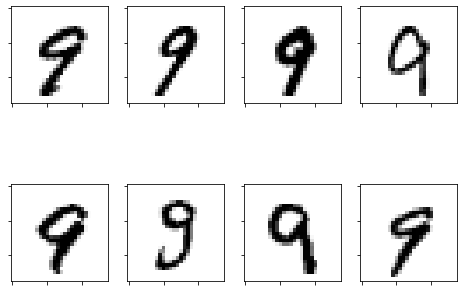

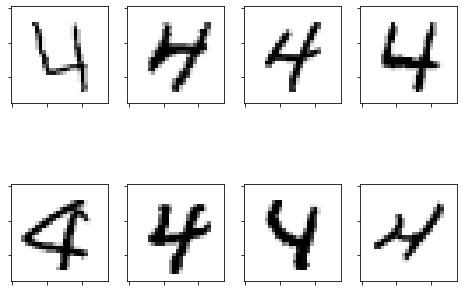

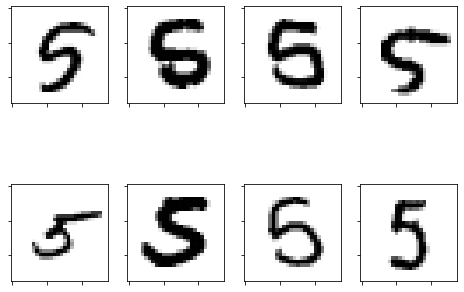

In [26]:
# show digits for 9 and 4 
minst_9_labels_idx = mnist_labels[mnist_labels == 9].index
mnist_9_features = mnist_features.iloc[minst_9_labels_idx]

minst_4_labels_idx = mnist_labels[mnist_labels == 4].index
mnist_4_features = mnist_features.iloc[minst_4_labels_idx]

minst_5_labels_idx = mnist_labels[mnist_labels == 5].index
mnist_5_features = mnist_features.iloc[minst_5_labels_idx]

print_digits(mnist_9_features)
print_digits(mnist_4_features)
print_digits(mnist_5_features)

# Refine the model
In this part I am trying to find the best hyperparameters for the model. For this I will use the randomizedsearch and the gridsearch method. 

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_cl = KNeighborsClassifier()
#knn_cl_grid = KNeighborsClassifier()
knn_cl_grid_rd = KNeighborsClassifier()

knn_cl.get_params().keys()     # what params to modify

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

## RandomizedSearchCV
In the following dictionary set you will find several configurations I tried out with the randomized search to find the best parameter area for my model. It ended up in the distribution set number 9 witch gave me a smaller parameter area to take a look into. In later process of this notebook I will use this information in the GridSearch function to try out with some specific parameters (not randomized) that could probably improve my accuracy.

In [28]:
# RandomizedSearch try
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from scipy.stats import expon
from scipy.stats import randint

# 'algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'

distributions = dict(
        leaf_size =randint(1,20)
        ,n_neighbors = randint(1,20)
        ,weights=['uniform','distance']
        ,p=[1,2]
        )

distributions_set2 = dict(
        n_neighbors = randint(1,10)
        ,weights=['uniform','distance']
        ,p=[1,2]
        )

distributions_set3 = dict(
        #leaf_size =randint(1,30)
        n_neighbors = randint(1,40) #[3,6,9,12,15,18,21] #
        ,weights = ['distance']
        #,p=[1]
        )

distributions_set4 = dict(
        #leaf_size =randint(1,30)
        n_neighbors = randint(1,40) #[3,6,9,12,15,18,21] #
        ,weights = ['uniform','distance']
        #,p=[1]
        )

distributions_set5 = dict(
        leaf_size =range(1,100)
        ,n_neighbors = range(1,100) #[3,6,9,12,15,18,21] #
        ,weights = ['uniform','distance']
        #,p=[1]
        )

distributions_set6 = dict(
        leaf_size =range(1,50)
        ,n_neighbors = range(1,50) #[3,6,9,12,15,18,21] #
        ,weights = ['uniform','distance']
        ,p=[1]
        )

distributions_set7 = dict(
        leaf_size =range(1,10)
        ,n_neighbors = range(1,10) #[3,6,9,12,15,18,21] #
        ,weights = ['distance']
       ## ,p=[2]
        )

distributions_set8 = dict(
        #leaf_size =range(1,10)
        n_neighbors = range(1,100) #[3,6,9,12,15,18,21] #
        ,weights = ['distance']
        ,p=[1]
        )

distributions_set9 = dict(n_neighbors = range(1,8)
                          ,weights = ['distance']
                          ,p=[1] 
                         )


knn_cl_ransearch = RandomizedSearchCV(knn_cl_grid_rd, distributions_set9, n_iter=3, cv=3, random_state=0, return_train_score=True, n_jobs=-1)
knn_cl_ransearch.fit(mnist_features_prepared, mnist_labels)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=3, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 8), 'p': [1],
                                        'weights': ['distance']},
                   random_state=0, return_train_score=True)

In [29]:
knn_cl_ransearch.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 3}

### Save and Load

In [30]:
# Model load and save structure.
import pickle

knnPkl_rnn_filename = 'knnPickle_dist9_3_rans'

knnPkl_dirname = '..\Another_MNIST_try'    # local Path
knnPkl_dirname_kgg = '../'                 # Kaggle path

knnPkl_rnn_fildir = os.path.join(knnPkl_dirname_kgg, knnPkl_rnn_filename)

In [31]:
# Save model#
pickle.dump(knn_cl_ransearch, open(knnPkl_rnn_fildir, 'wb'))

In [32]:
# Load model
knn_cl_ransearch = pickle.load(open(knnPkl_rnn_fildir, 'rb'))

In [33]:
cv_results_knn_ransearch = knn_cl_ransearch.cv_results_

for mean_score, params in zip(cv_results_knn_ransearch["mean_test_score"],cv_results_knn_ransearch["params"]):
    print(mean_score, params)

0.9518333333333334 {'weights': 'distance', 'p': 1, 'n_neighbors': 7}
0.954047619047619 {'weights': 'distance', 'p': 1, 'n_neighbors': 3}
0.9502857142857143 {'weights': 'distance', 'p': 1, 'n_neighbors': 2}


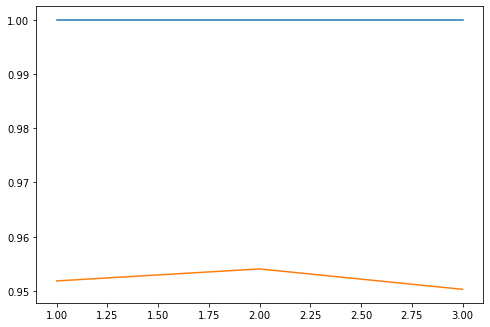

In [34]:
fig = plt.figure(figsize=(8,12))

ax = fig.add_subplot(2,1,1)

ax.plot(list(range(1,len(cv_results_knn_ransearch['mean_train_score']) + 1)), cv_results_knn_ransearch['mean_train_score'])
ax.plot(list(range(1,len(cv_results_knn_ransearch['mean_test_score']) + 1)), cv_results_knn_ransearch['mean_test_score'])

## GridSearch
With this GridSearch I want to look closer into specific parameters. I have already tried some different values around the n_neighbors parameter (see the other dictionary params grids ("param_grid_try_#") ) and took a closer look into the leaf_size which in the end turns out as a parameter that does not have any effects on the accuracy of the model with this dataset.

In further processing, it turns out that there is more need to prepare the data for the KNearestNeighbor algorithm to get better accuracy. During the research, I found out that there is a way to preprocess data due to clustering with the KMeans algorithm. So I am going to use a pipeline with the KMeans as the first step for preprocessing and train the KNeighbors model with the results from the processing. It is possible to use the Gridsearch in combination with a pipeline. The parameters have to be named specifically so the Gridsearch is able to match each parameter to its corresponding function/algorithm.

EDIT: While I am writing this here I had already tried several parameters with the Gridsearch approach, especially with the cluster parameter. It turns out that there is no good cluster amount to prepare the data in that way it would support the KNeighbors algorithm to increase its accuracy. I also added a calculation for the silhouette coefficient to determine the best cluster amount by using the KMeans by himself, no success! KMeans clustering or preprocessing does not support the KNeighbors algorithm with the given dataset. 

However, I let the code as it is to show the usage of pipelines, KMeans, and silhouette coefficient calculation for learning purposes.

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Pipeline for transforming / scaling the data in various ways
prep_pipeline = Pipeline([
    ('kmeans', KMeans()),
    ('kneighbors', KNeighborsClassifier())
])

In [36]:
KMeans().get_params().keys()

dict_keys(['algorithm', 'copy_x', 'init', 'max_iter', 'n_clusters', 'n_init', 'n_jobs', 'precompute_distances', 'random_state', 'tol', 'verbose'])

### KMeans as Data Preparation Step
In this part I will try to find out whether the KMeans is a good data preparation step based on the given train data or not. This goes hand in hand with the determination of finding the correct amount of clusters, if they exist. A very good indicator for the correct amount of clusters is the silhouette coefficient.

In [37]:
k_range = range(20,500,20) # defining the range of clusters looking into
k_list = list()


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans = kmeans.fit(mnist_features_prepared)
    
    k_list.append(kmeans)

Getting the inertia of the Clusters for a plot

In [38]:
inertias_list = []
for model in k_list:
    inertias_list.append([model.inertia_])
    

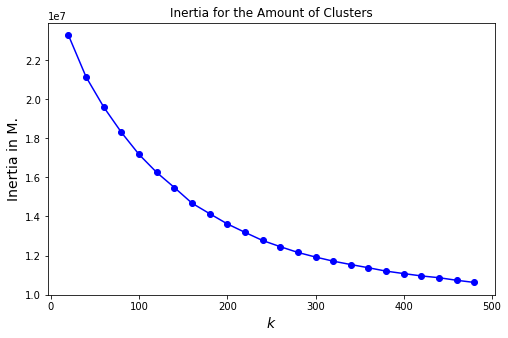

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias_list, "bo-")
plt.title("Inertia for the Amount of Clusters")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia in M.", fontsize=14)
plt.show()

In [40]:
from sklearn.metrics import silhouette_score

sil_list = list()

for model in k_list:
    sil_score = silhouette_score(mnist_features_prepared,model.labels_)
    sil_list.append(sil_score)

In [41]:
best_index = np.argmax(sil_list)
best_k = k_list[best_index]
best_score = sil_list[best_index]

In [42]:
print(best_score)
print(best_k)

0.048883322205705
KMeans(n_clusters=280, random_state=42)


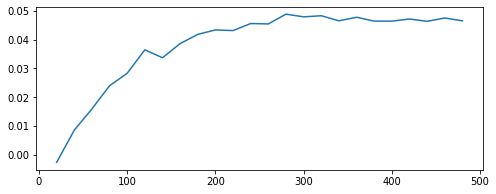

In [43]:
plt.figure(figsize=(8,3))
plt.plot(k_range,sil_list)

A closer look into the different cluster runs lead to the realization, that KMeans will not support me with this dataset (Neverthelese I will leave it in the configuration as described in the chapter headline)

In [44]:
##%%time
from sklearn.model_selection import GridSearchCV

param_grid_try_1 =[
  { 
    'n_neighbors':[1,2,3,4],
    'weights':['distance','uniform'],
    'p':[1]
  },
  { 
    'n_neighbors':[4,5,6],
    'weights':['distance'],
    'p':[1]
  },
   {
    'n_neighbors':[4],
    'leaf_size': [200,300,400],
    'weights':['distance'],
    'p':[1]
  }
]


param_grid_try_2 = dict(
   kmeans__n_clusters= [400,500],
   kneighbors__n_neighbors=[4,5,6,10,15,20],
   kneighbors__weights=['distance'],
   kneighbors__p=[1]
)

param_grid_try_3 = dict(
   kmeans__n_clusters=[400,500,600],
   kneighbors__n_neighbors=[2,3,4,5],
   kneighbors__weights=['distance'],
   kneighbors__p=[1]
)

param_grid_try_4 = dict(
   kmeans__n_clusters= [200,300,350,400,500],
   kneighbors__n_neighbors=[4],
   kneighbors__weights=['distance'],
   kneighbors__p=[2]  
)

param_grid_try_5 = dict(
   kmeans__n_clusters= [5000],
   kneighbors__n_neighbors=[4],
   kneighbors__weights=['distance']
)

## one with kmeans__n_clusters param for showcase
param_grid = dict(
   kmeans__n_clusters=[50],
   kneighbors__n_neighbors=[4],
   kneighbors__weights=['distance'],
   kneighbors__p=[1]  
)

grid_search = GridSearchCV(prep_pipeline, param_grid, cv=3, n_jobs=1, return_train_score=True, verbose=2)
grid_search.fit(mnist_features_prepared, mnist_labels)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END kmeans__n_clusters=50, kneighbors__n_neighbors=4, kneighbors__p=1, kneighbors__weights=distance; total time= 2.4min
[CV] END kmeans__n_clusters=50, kneighbors__n_neighbors=4, kneighbors__p=1, kneighbors__weights=distance; total time= 2.3min
[CV] END kmeans__n_clusters=50, kneighbors__n_neighbors=4, kneighbors__p=1, kneighbors__weights=distance; total time= 2.3min


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans()),
                                       ('kneighbors', KNeighborsClassifier())]),
             n_jobs=1,
             param_grid={'kmeans__n_clusters': [50],
                         'kneighbors__n_neighbors': [4], 'kneighbors__p': [1],
                         'kneighbors__weights': ['distance']},
             return_train_score=True, verbose=2)

In [45]:
# Model load and save structure.
knnPkl_gs_filename = 'knnPickle_gs_3'

knnPkl_gs_fildir = os.path.join(knnPkl_dirname_kgg, knnPkl_gs_filename)

In [46]:
# Save model
#pickle.dump(grid_search, open(knnPkl_gs_fildir, 'wb'))

In [47]:
# Load model
#grid_search = pickle.load(open(knnPkl_gs_fildir, 'rb'))

In [48]:
print("Best params: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best params:  {'kmeans__n_clusters': 50, 'kneighbors__n_neighbors': 4, 'kneighbors__p': 1, 'kneighbors__weights': 'distance'}
Best score:  0.872642857142857


In [49]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(mean_score, params)

0.872642857142857 {'kmeans__n_clusters': 50, 'kneighbors__n_neighbors': 4, 'kneighbors__p': 1, 'kneighbors__weights': 'distance'}


# Final
Retraining the model with the best hyperparam set found out

In [50]:
knn_final = KNeighborsClassifier()
knn_final = KNeighborsClassifier(n_neighbors=4,weights='distance',p=1, n_jobs=-1)
knn_final.fit(mnist_features_prepared, mnist_labels)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, p=1, weights='distance')

In [51]:
test_copy = test.copy()

test_prep = num_pipeline.transform(test_copy) # Transform data for kneighbors

In [52]:
print("Prediction: " , knn_cl_ransearch.predict(test_prep[5].reshape(1,-1)))
print("Propability: ", knn_cl_ransearch.predict_proba(test_prep[5].reshape(1,-1)))

print("Prediction: " , grid_search.predict(test_prep[5].reshape(1,-1)))
print("Propability: ", grid_search.predict_proba(test_prep[5].reshape(1,-1)))

print("Prediction: " , knn_final.predict(test_prep[5].reshape(1,-1)))
print("Propability: ", knn_final.predict_proba(test_prep[5].reshape(1,-1)))

Prediction:  [7]
Propability:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Prediction:  [7]
Propability:  [[0.         0.         0.         0.         0.         0.
  0.         0.75216474 0.         0.24783526]]
Prediction:  [7]
Propability:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


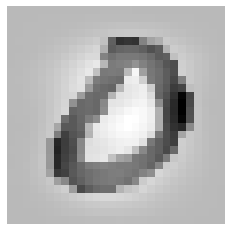

In [53]:
plt.imshow(np.asfarray(test_prep[6]).reshape(28,28), cmap='binary')
plt.axis("off")
plt.show()

## Preparing Submission

In [54]:
mnist_submission = pd.DataFrame(columns=['ImageId','Label'])
test_prep_df = pd.DataFrame(data=test_prep)

In [55]:
# fill submission file
i=0
for row in test_prep:
    i = i+1
    index = i
    label = knn_final.predict(row.reshape(1,-1))
    
    mnist_submission = mnist_submission.append({'ImageId' : index , 'Label': label} , ignore_index=True)
    pass

In [56]:
# Preparing the submission file
mnist_submission.ImageId = mnist_submission.ImageId.astype(int)
mnist_submission.Label = mnist_submission.Label.astype(int)

In [57]:
mnist_submission.to_csv("mnist_submission.csv",index=False)

In [58]:
mnist_submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
